In [38]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size="5" color="red"><b>ch2. 군집분석</b></font>
# 1절. 군집모델(클러스터링)
- 클러스터(cluster) : 독립변수의 특성이 유사한 데이터의 그룹
- 클러스터링(clustering) : 주어진 데이터를 여러 개의 클러스터로 구분하는 것 

1) 중심 기반 클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg" 
     style="display: block; margin-left: 0; width: 20%;">

2) 연결기반 클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg" 
     width="300" 
     style="display: block; margin-left: 0; width: 20%;">

3) 밀도기반 클러스터링(DBSCAN의 변형으로 OPTICS) : https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg" 
     width="300" 
     style="display: block; margin-left: 0; width: 20%;">

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
# sklearn의 로직들이 멀티 스레트로 실행 => 단일스레드 작업을 하도록

# 2절. K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 클러스터의 중심을 찾아가는 알고리즘
- 세부알고리즘 : 교안6p

In [15]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

In [10]:
# 분류를 위한 가상의 데이터 생성
X, y = make_classification(n_samples=20,           # 데이터 수(기본값 100)
                           n_features=2,           # 독립변수갯수(기본값 20)
                           n_informative=2,        # 종속변수에 영향을 미치는 독립변수 갯수(기본값 2)
                           n_redundant=0,          # 종속변수에 영향을 미치지 않는 독립변수 갯수(기본값 2)
                           n_clusters_per_class=1,  # 각 종속변수 그룹별 서브그룹이 없음
                           n_classes=2,            # 종속변수의 그룹 수
                           random_state=123)
import numpy as np
np.c_[X,y][:3]

array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

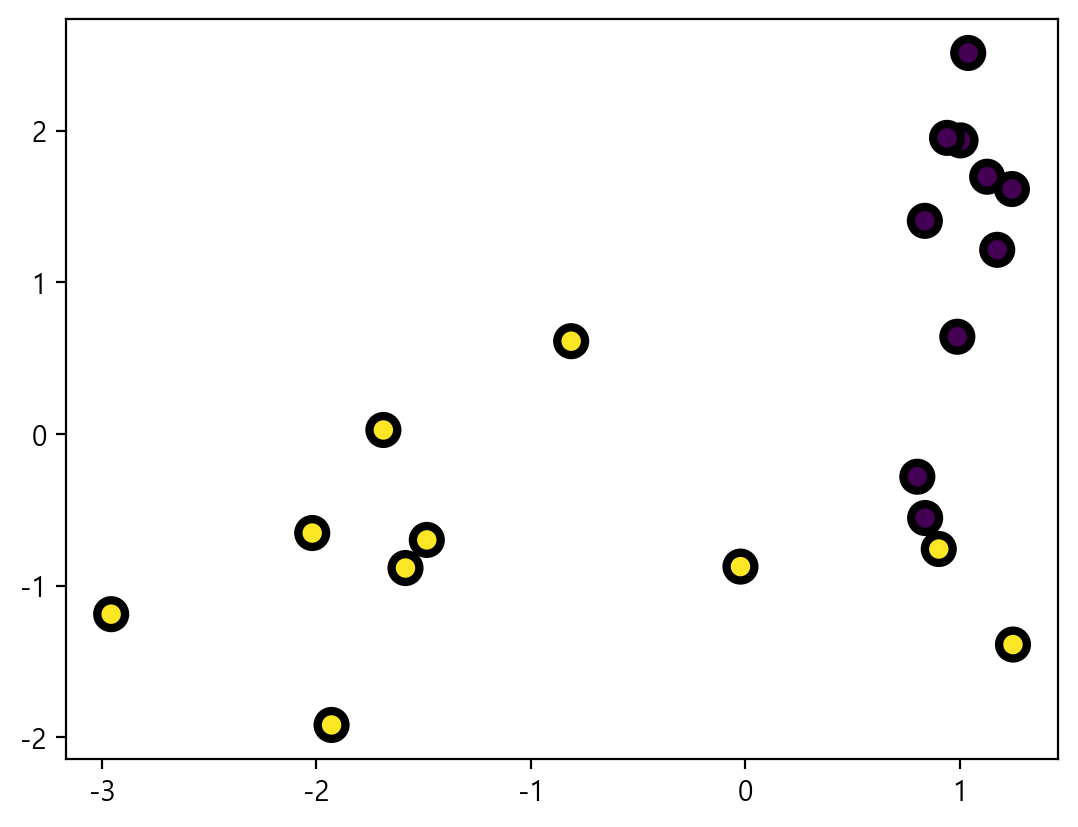

In [16]:
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=100, edgecolors='k', lw=3 )

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, # 군의 갯수
              init="k-means++", # 초기중심점을 서로 멀리 초기화. random(초기중심점랜덤)
              n_init=10, # 각 다른 초기값을 10번 실행해보고 가장 좋은 모델 선택
              max_iter=300) # 각 실행에서 300번 반복(중심 옮기기)
model.fit(X)

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init=10)

In [19]:
c0, c1 = model.cluster_centers_ # 모델이 정한 두 중심점
print(c0)
print(c1)

[-1.56258716 -0.69768199]
[1.01138251 0.83200493]


In [20]:
print('modelLabel :', model.labels_)
pred = model.predict(X)
print("  예 측 값 :", pred)
print("  실 제 값 :", y)

modelLabel : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
  예 측 값 : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
  실 제 값 : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


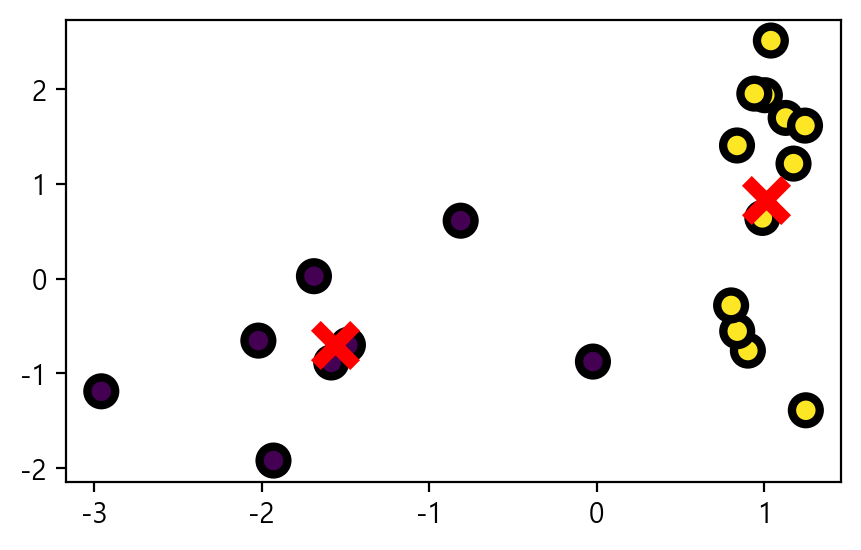

In [21]:
plt.figure(figsize=(5,3))
plt.scatter(x=X[:,0], y=X[:,1], c=pred, s=100, edgecolors='k', lw=3 )
plt.scatter(x=c0[0], y=c0[1], s=200, marker='x', lw=5, c='r')
plt.scatter(x=c1[0], y=c1[1], s=200, marker='x', lw=5, c='r')
plt.show()

## cf.Normalizer 적용

In [23]:
import pandas as pd
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor][:3]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667]])

In [24]:
model = KMeans(n_clusters=2, # 군의 갯수
              init="k-means++", #초기중심을 서로 멀리 초기화. random(초기중심점랜덤)
              n_init=10, # 각 다른 초기값을 10번 실행해보고 가장 좋은 모델 선택
              max_iter=300) # 각 실행에서 300번 반복(중심 옮기기)
model.fit(Xnor)

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init=10)

In [25]:
model.labels_ # 모델이 그룹핑한 결과

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [26]:
d0, d1 = model.cluster_centers_ # 모델이 정한 중심점
print(d0, d1)

[0.64128684 0.34902823] [-0.77398837 -0.33522479]


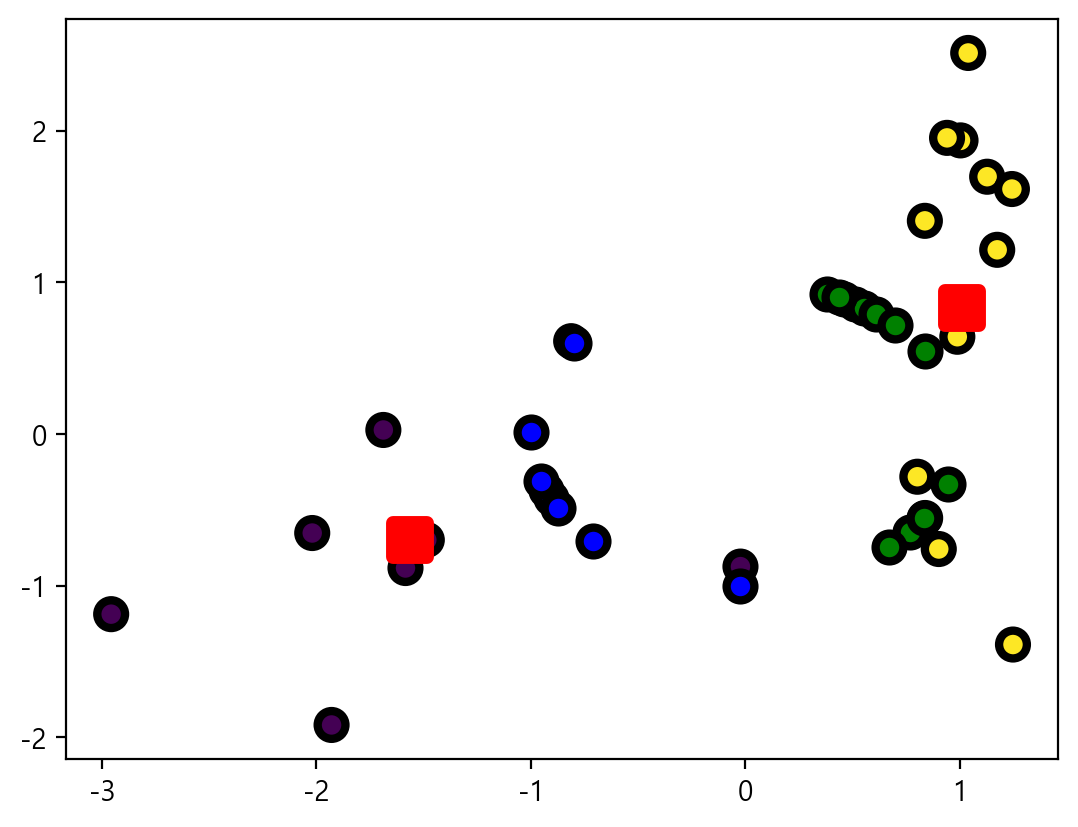

In [28]:
plt.scatter(x=X[:,0], y=X[:,1], c=pred, s=100, edgecolors='k', lw=3 )
plt.scatter(x=c0[0], y=c0[1], s=150, marker='s', lw=5, c='r')
plt.scatter(x=c1[0], y=c1[1], s=150, marker='s', lw=5, c='r')

plt.scatter(x=Xnor[model.labels_==0,0], 
            y=Xnor[model.labels_==0,1], 
            c='g', s=100, edgecolors='k', lw=3 )
plt.scatter(x=Xnor[model.labels_==1,0], 
            y=Xnor[model.labels_==1,1], 
            c='b', s=100, edgecolors='k', lw=3 )
plt.show()

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.cluster import KMeans

## K-Means 클러스터링의 한계점(pt13)
- 군의 특성이 다를 경우
    - 크기
    - 군의 밀도
    - 군이 구형이 아닌경우(비구형인 경우)
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링
### 군의 크기가 다른 경우

In [31]:
import numpy as np
np.random.seed(0)
# 평균 : -10, 표준편차: 2인 10행 2열 데이터 : group0
group0 = np.random.normal(loc=-10, scale=2, size=(10,2))
y = np.full(group0.shape[0], 0)
group0 = np.c_[group0, y]
group0

array([[ -6.47189531,  -9.19968558,   0.        ],
       [ -8.04252403,  -5.5182136 ,   0.        ],
       [ -6.26488402, -11.95455576,   0.        ],
       [ -8.09982316, -10.30271442,   0.        ],
       [-10.2064377 ,  -9.178803  ,   0.        ],
       [ -9.71191286,  -7.09145299,   0.        ],
       [ -8.47792455,  -9.75664997,   0.        ],
       [ -9.11227353,  -9.33265135,   0.        ],
       [ -7.01184185, -10.41031653,   0.        ],
       [ -9.3738646 , -11.70819148,   0.        ]])

In [32]:
# 평균: 10, 표준편차: 2인 10행 2열 데이터 : group1
group1 = np.random.normal(loc=10, scale=2, size=(10,2))
y = np.full(group1.shape[0], 1)
group1 = np.c_[group1, y]
group1[:2]

array([[ 4.89402037, 11.30723719,  1.        ],
       [11.7288724 ,  8.51566996,  1.        ]])

In [33]:
# 평균: 0, 표준편차: 5인 100행 2열 데이터 : group2
group2 = np.random.normal(loc=0, scale=2, size=(100,2))
y = np.full(group2.shape[0], 2)
group2 = np.c_[group2, y]
group2[:2]

array([[-2.09710593, -2.84003587,  2.        ],
       [-3.41254038,  3.90155079,  2.        ]])

In [37]:
data = np.r_[group0, group1, group2]
data[::10], data.shape

(array([[-6.47189531, -9.19968558,  0.        ],
        [ 4.89402037, 11.30723719,  1.        ],
        [-2.09710593, -2.84003587,  2.        ],
        [-1.3449209 , -0.71910632,  2.        ],
        [-2.33029968,  1.80165297,  2.        ],
        [ 3.76630139, -2.69551812,  2.        ],
        [ 0.75285106, -2.19880158,  2.        ],
        [-2.98251519,  0.8787834 ,  2.        ],
        [-0.9960649 ,  3.85906411,  2.        ],
        [-0.70798782, -2.74990259,  2.        ],
        [-0.73836368, -0.47875836,  2.        ],
        [-1.91189   , -0.69196355,  2.        ]]),
 (120, 3))

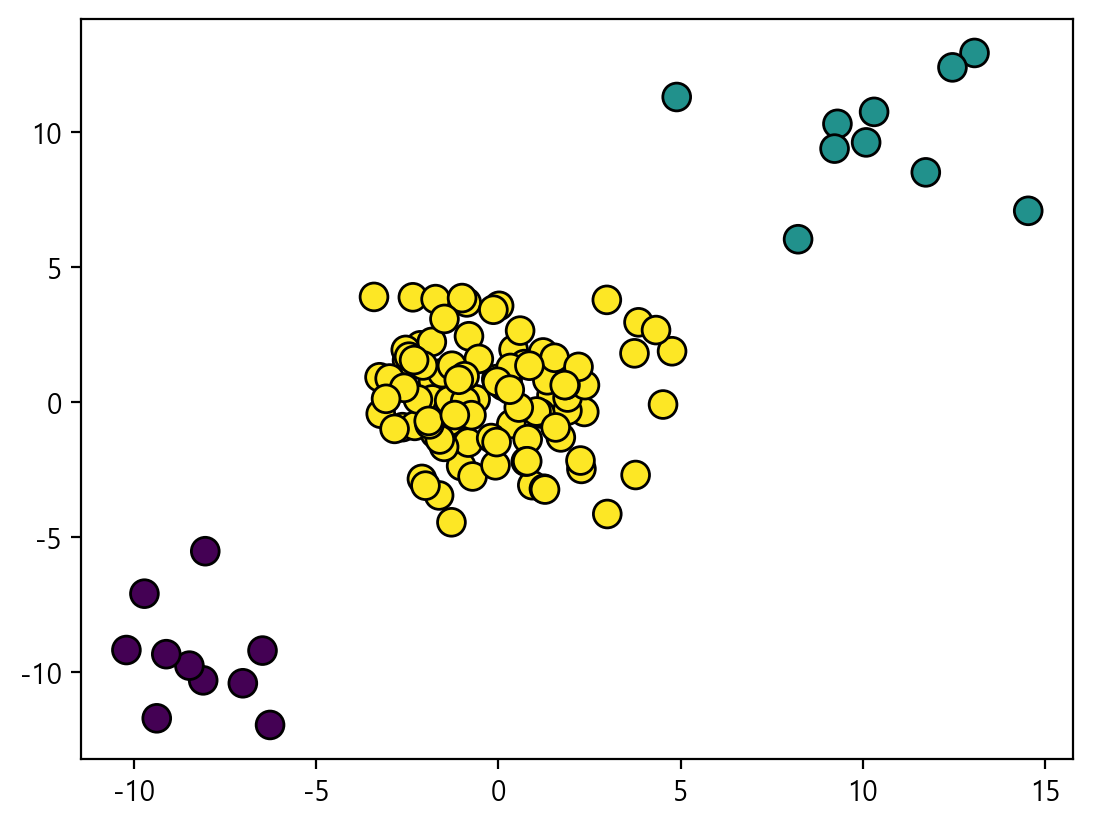

In [39]:
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,2], s=100, edgecolors='k')
plt.show()

In [40]:
model = KMeans(n_clusters=3,
              init='k-means++',
              n_init="auto",
              max_iter=300)
model.fit(data[:, :2])

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto')

In [41]:
c = model.cluster_centers_ # 중심점
c

array([[-8.27733816, -9.44532347],
       [10.38439043,  9.83861099],
       [-0.21227963,  0.19111385]])

In [45]:
pred = model.predict(data[:,:2]) # 모델이 클러스터링한 결과
pred = model.labels_

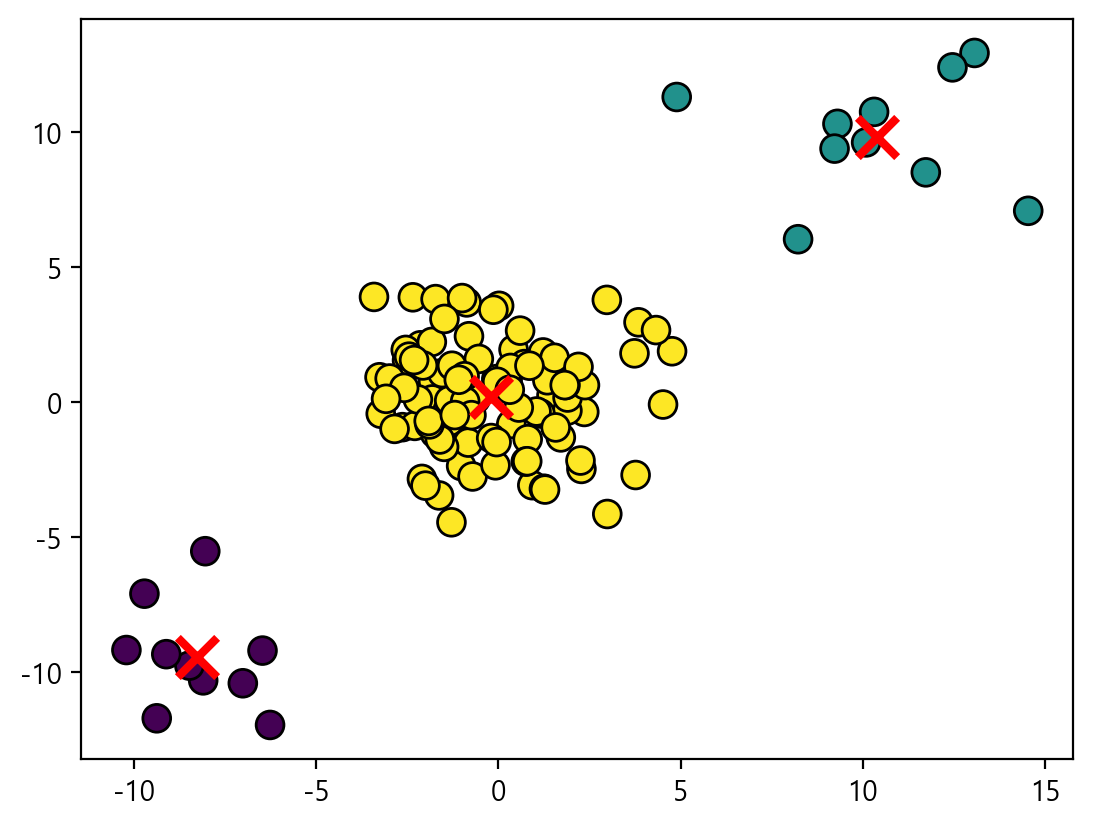

In [47]:
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100, edgecolors='k')
plt.scatter(x=c[:,0], y=c[:,1], c='r', marker='x', s=200, lw=3)
plt.show()

In [48]:
model = KMeans(n_clusters=6, init="k-means++", n_init=10)
model.fit(data[:, :2])

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, n_init=10)

In [49]:
c = model.cluster_centers_ # 중심점
pred = model.labels_ # 모델이 클러스터(군집화)한 결과
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0,
       4, 0, 4, 4, 3, 5, 5, 4, 4, 3, 3, 4, 4, 5, 3, 3, 4, 4, 0, 3, 5, 5,
       0, 0, 5, 5, 0, 5, 3, 0, 0, 4, 5, 5, 0, 0, 5, 5, 3, 5, 4, 0, 5, 0,
       4, 0, 5, 3, 4, 5, 5, 0, 4, 0, 4, 3, 3, 4, 0, 5, 0, 4, 5, 5, 3, 0,
       4, 4, 3, 3, 3, 4, 0, 4, 3, 5, 5, 5, 4, 5, 3, 3, 5, 5, 3, 4, 5, 5,
       4, 0, 4, 5, 4, 4, 0, 0, 3, 5])

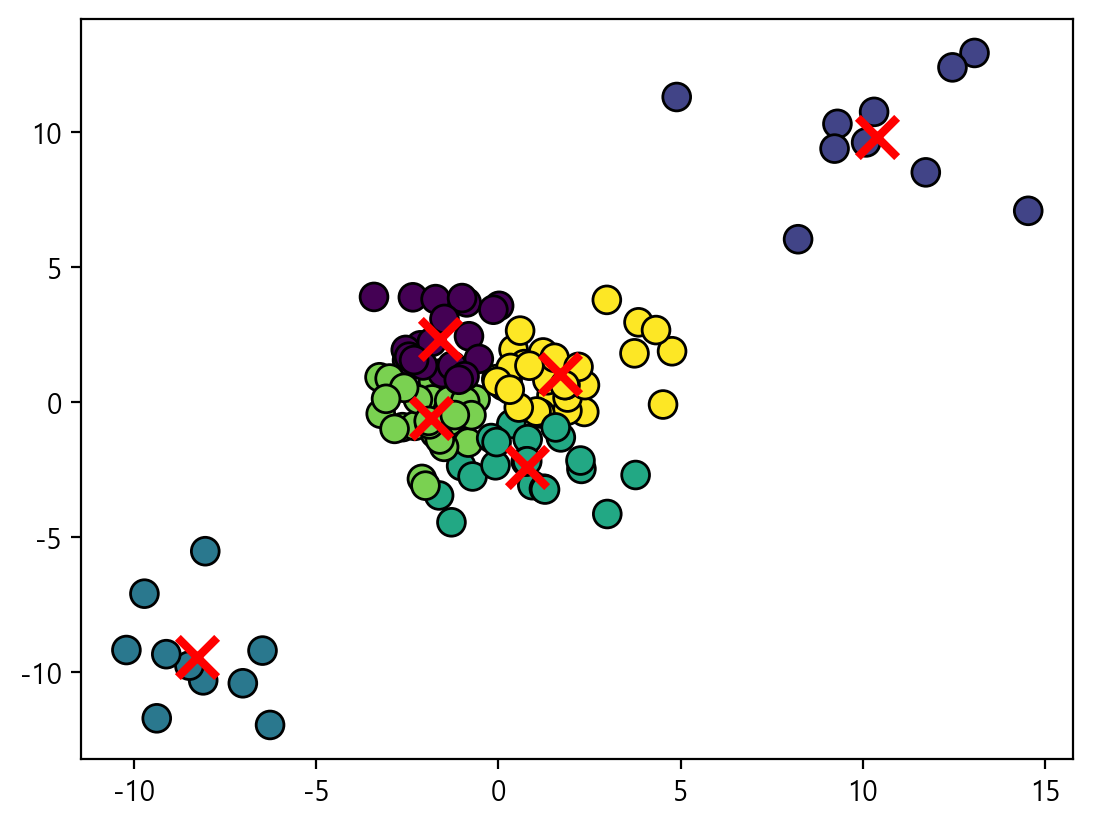

In [50]:
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100, edgecolors='k')
plt.scatter(x=c[:,0], y=c[:,1], c='r', marker='x', s=200, lw=3)
plt.show()

In [53]:
colors = ['r','g','b','c','m','k'] # 012345
data[pred==0, 0]

array([-3.41254038, -2.50559072, -2.33029968, -2.14150524, -0.80635389,
        0.02100004, -2.54097   , -2.34624681, -1.72245137, -0.53600674,
       -0.8703071 , -1.53983215, -1.27169216, -1.82564445, -0.13648321,
       -0.9960649 , -2.45087104, -2.06848568, -1.47912599, -0.92719195,
       -1.08572295, -2.31236486])

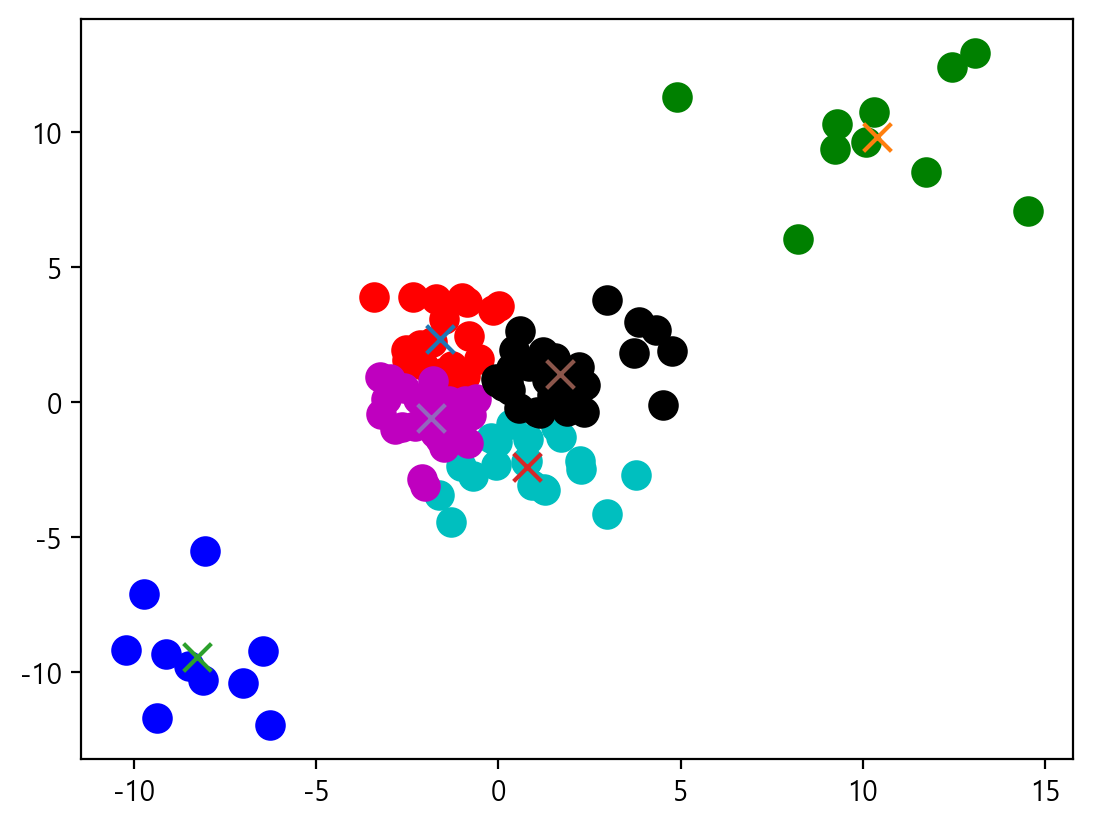

In [54]:
colors = ['r','g','b','c','m','k'] # 0 / 2 / 1345
for i in range(len(c)):
    plt.scatter(x=data[pred==i, 0], y=data[pred==i, 1], c=colors[i], s=100)
    plt.scatter(x=c[i, 0], y=c[i, 1], marker='x', s=100)

# 3절. Hierachical 클러스터링(계층적 군집)

- 계층적 분석(linkage) -> dendrogram -> fcluster를 이용해서 클러스터를 생성(군집화)
    - 군끼리 묶으면서 최종적으로 하나의 군집이 될 때까지 묶는 클러스터링
    - 군집의 수를 미리 정해주지 않음.
    - 군집간의 거리 기반으로 클러스터링

In [55]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
86,6.7,3.1,4.7,1.5,versicolor


In [56]:
# 계층적 군집 적용을 위해 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris.species)

In [57]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [58]:
from scipy.cluster.hierarchy import linkage
# method : 거리계산을 어떻게 할지
# method="complete" : 두 클러스터에서 가장 먼 거리를 이용
# method="single" : 두 클러스터에서 가장 먼 거리를 이용
# method="average" : 두 클러스터내의 각 점에서 다른 클러스터의 모든 점의 평균거리 이용
cluster_model = linkage(iris, method="complete")

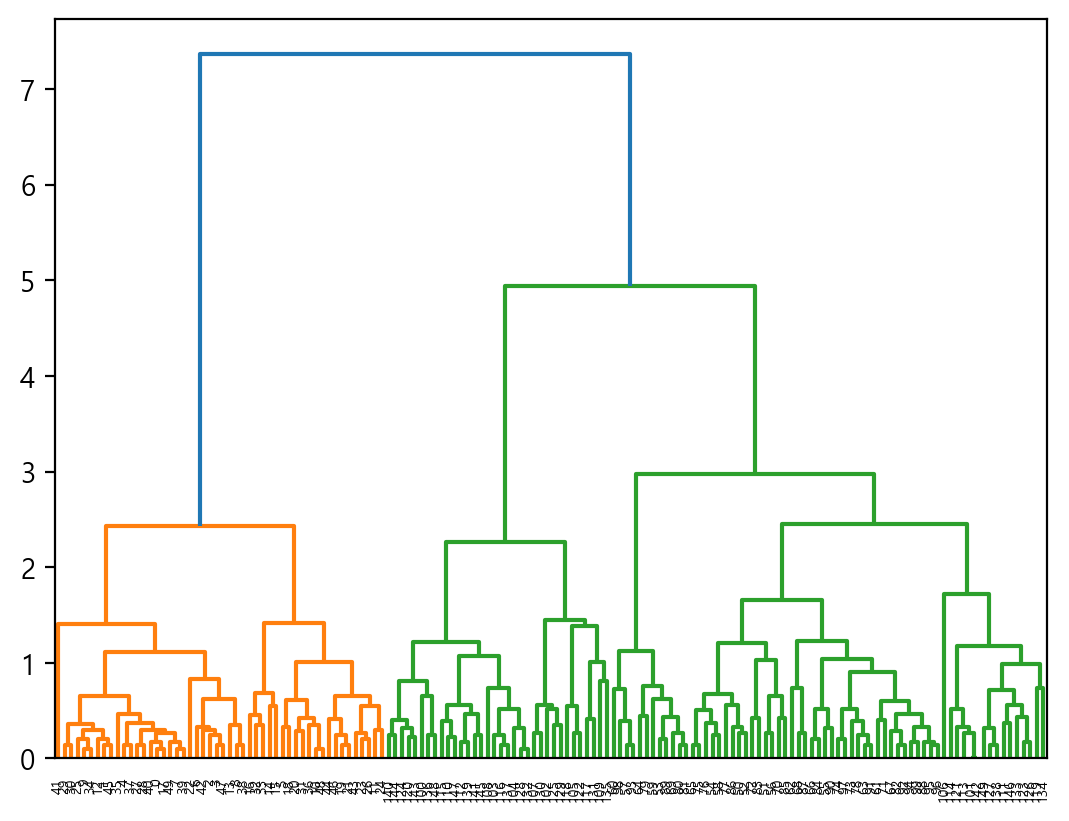

In [60]:
from scipy.cluster.hierarchy import dendrogram
dendrogram(cluster_model, labels=iris.index)
plt.savefig('data/ch02_iris.png', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
from scipy.cluster.hierarchy import fcluster # 군집화
fcluster(cluster_model,
        t=4, #dendrogram의 y축 값
        criterion="distance") # 군집화 기준
# criterion="distance" 일 때, t값은 dendrogram의 y축 값

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [63]:
fcluster(cluster_model,
        t=3,
        criterion="maxclust")
# criterion="maxclust" 일 때, t값은 클러스터의 갯수(군집화된 그룹 갯수)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [64]:
fcluster(cluster_model, 5, criterion="distance")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

# 4절. DBSCAN 클러스터링
- 연결 기반(밀도기반) 군집화 알고리즘(이상치를 자동 감지)
- 단점 : 클러스터의 밀도가 일정하지 않으면 성능이 낮아짐.

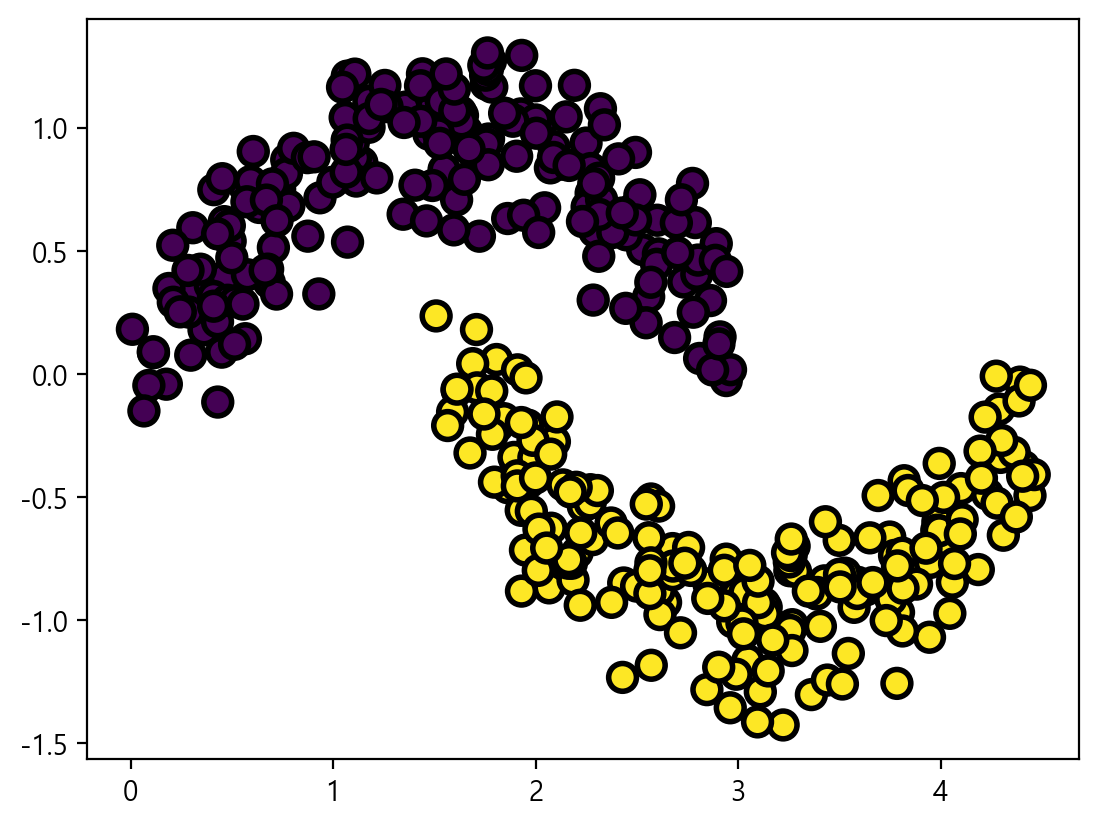

In [69]:
X1 = np.random.rand(200)*3 # 0<=X1<2의 실수 난수 200개
noise = np.random.normal(0, 0.2, 200)
Y1 = np.sin(X1) + noise
group1 = np.c_[X1, Y1, np.full(200, 0)]

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2, np.full(200, 1)]
data = np.r_[group1, group2]

plt.scatter(data[:,0], data[:,1], c=data[:,2], s=100, edgecolors='k', lw=2)

In [71]:
from sklearn.cluster import DBSCAN
# 반경 0.3이내에 최소 10개는 있어야 군집 시작
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(data[:, :2])

DBSCAN(eps=0.3, min_samples=10)

In [77]:
labels = db.labels_        # 모델이 군집화한 결과 (-1은 이상치 인식) 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # 클러스터 수
n_noise_ = list(labels).count(-1)
print(f'이상치를 제외한 클러스터수 :{n_clusters_}, 이상치갯수:{n_noise_}개')

이상치를 제외한 클러스터수 :2, 이상치갯수:1개


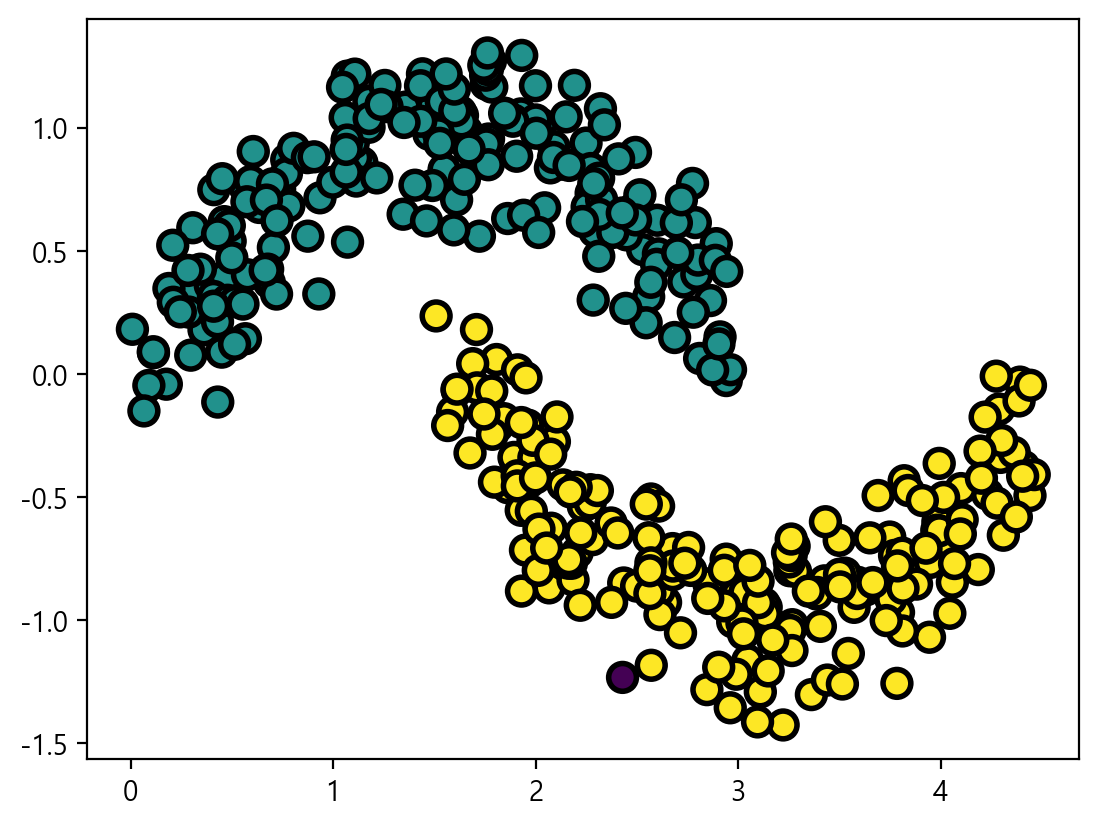

In [78]:
plt.scatter(data[:,0], data[:,1], c=labels, s=100, edgecolors='k', lw=2)

# 5절. 모형 성능평가
- score메소드를 통해 예측 모형 평가(분류, 회귀, 군집에서는 안씀)
- metrics 모듈의 메소드를 통해 군집 모형 평가
## 5.1 metrics 함수이용
    - 클러스터의 소속과 갯수를 모두 알고있을 경우 평가

In [79]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [80]:
iris_X = iris.iloc[:,:-1]
iris_y = iris.iloc[:,-1]
iris_X.shape, iris_y.shape

((150, 4), (150,))

In [83]:
iris_model3 = KMeans(n_clusters=3, n_init=10, random_state=1)
iris_model3.fit(iris_X)

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=1)

In [89]:
pred = iris_model3.labels_
pred = iris_model3.predict(iris_X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [85]:
pred3 = np.choose(pred, [1,0,2])
pred3 # 조정된 예측값

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [87]:
# 3개 cluster로 군집화한 자료
print('실제값 :', iris_y[::50])
print('예측값 :', pred3[::50])

실제값 : 0      0
50     1
100    2
Name: species, dtype: int32
예측값 : [0 1 2]


In [90]:
iris_model2 = KMeans(n_clusters=2, n_init=10, random_state=1)
iris_model2.fit(iris_X)

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init=10, random_state=1)

In [92]:
pred2 = iris_model2.labels_

In [93]:
# 2개 cluster로 군집화한 자료
iris_y2 = np.array([0]*50 + [1]*100)
print('실제값 : ', iris_y2)
print('예측값 : ', pred2)

실제값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
예측값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [96]:
# 클러스터가 3개인 경우 평가
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris_y, # 실제값
                    labels_pred=pred3) # 클러스터링 예측

0.7302382722834697

In [97]:
# 클러스터가 2개인 경우 평가
adjusted_rand_score(labels_true=iris_y2,
                   labels_pred=pred2)

0.920405050901892

In [98]:
from sklearn.metrics import mutual_info_score # 상호 의존도를 나타내는 지표
# 클러스터가 3개인 경우 평가
mutual_info_score(iris_y, pred3)

0.8255910976103356

In [99]:
# 클러스터가 2개인 경우 평가
mutual_info_score(iris_y2, pred2)

0.5596576064224734

In [100]:
from sklearn.metrics import v_measure_score
v_measure_score(iris_y, pred3)

0.7581756800057784

In [102]:
v_measure_score(iris_y2, pred2) # 2개 그룹으로 군집화하는 것이 좋은 성능이다.

0.870385156563164

## 5.2 실루엣 갯수
- 클러스터 개수, 소속을 모두 모르고 있을 경우 평가

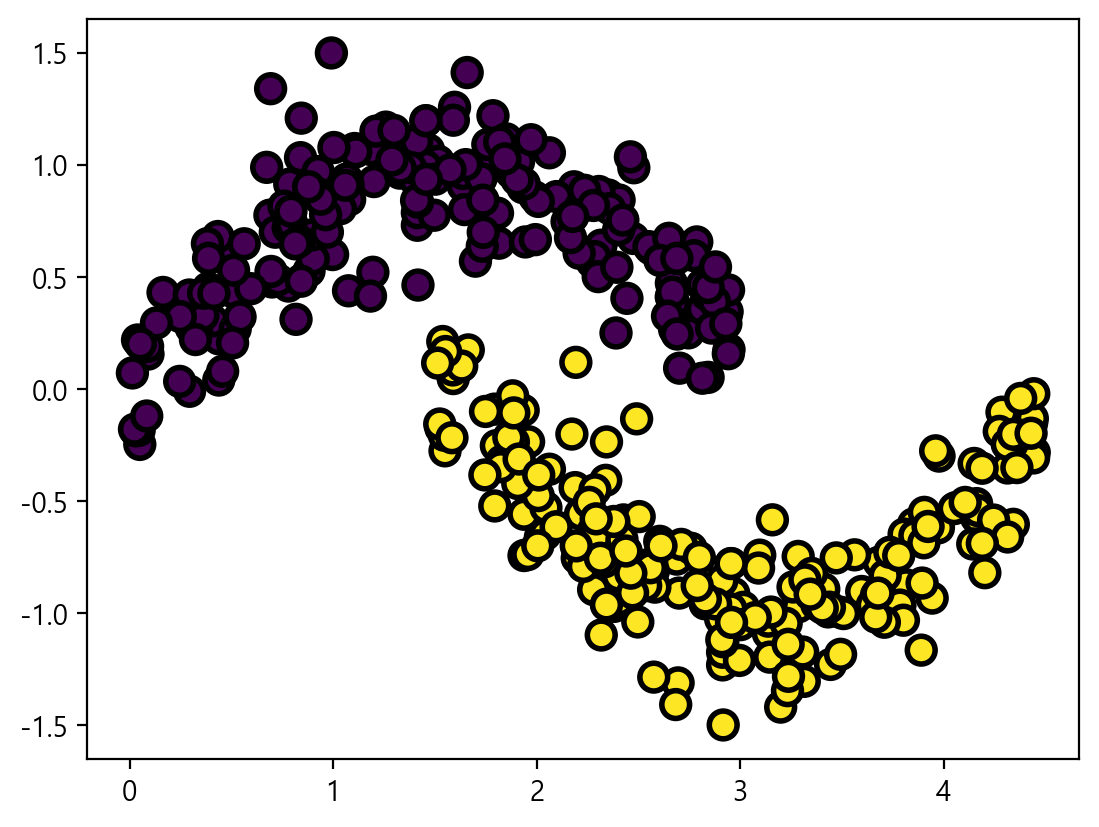

In [103]:
X1 = np.random.rand(200)*3 # 0<=X1<2의 실수 난수 200개
noise = np.random.normal(0, 0.2, 200)
Y1 = np.sin(X1) + noise
group1 = np.c_[X1, Y1, np.full(200, 0)]

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2, np.full(200, 1)]
data = np.r_[group1, group2]

plt.scatter(data[:,0], data[:,1], c=data[:,2], s=100, edgecolors='k', lw=2)

In [110]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters,
                  n_init=10, 
                  random_state=2)
    model.fit(data[:, :-1])
    score = silhouette_score(X=data[:,:-1],
                            labels=model.labels_)
    print("클러스트수 : {}, 실루엣 계수 : {}".format(n_clusters, score))
# 실루엣 계수가 가장 높은 6개로 클러스터링 할 예정

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: 

클러스트수 : 2, 실루엣 계수 : 0.5099063885529571
클러스트수 : 3, 실루엣 계수 : 0.44991245742717517
클러스트수 : 4, 실루엣 계수 : 0.46463301774592203
클러스트수 : 5, 실루엣 계수 : 0.4746483741044471
클러스트수 : 6, 실루엣 계수 : 0.48904084590531866


C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: 

클러스트수 : 7, 실루엣 계수 : 0.49275753454143106
클러스트수 : 8, 실루엣 계수 : 0.4860490404654118
클러스트수 : 9, 실루엣 계수 : 0.46456673831124834
클러스트수 : 10, 실루엣 계수 : 0.4639254521826865


C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


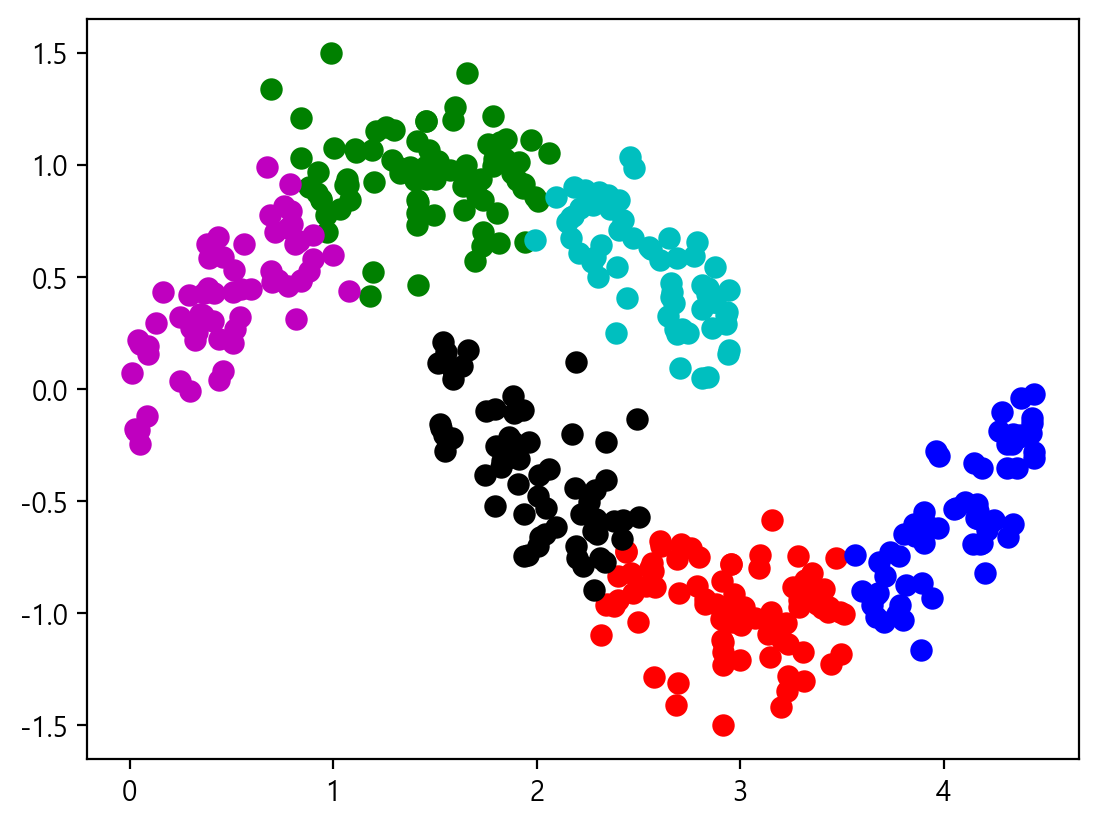

In [113]:
model = KMeans(n_clusters=6, n_init=10, init="k-means++")
model.fit(data[:, :-1])
centers = model.cluster_centers_
colors = ['r','g','b','c','m','k']
for i in range(len(colors)):
    plt.scatter( data[model.labels_==i, 0], 
                 data[model.labels_==i, 1], 
                 c=colors[i], s=50)